In [474]:
import numpy as np
import matplotlib.pyplot as plt

C1. Singular Value Decomposition

In [475]:
# a)
n = 100
delta_n = 2/(n-1)
grid = np.linspace(-1,1,n)

# plt.figure()
# plt.plot(grid)
# plt.show()

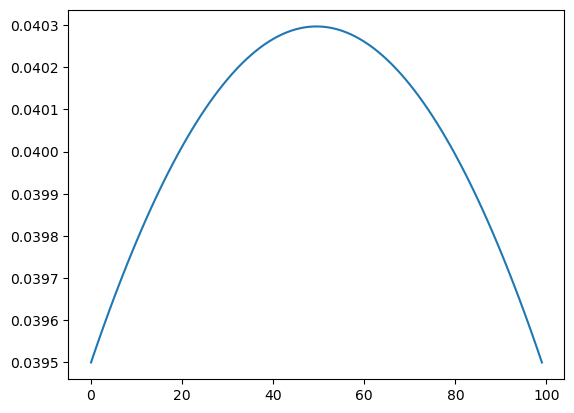

In [476]:
# b)
mean = 0
sigma = 0.2

def gaussian_1D (mean, sigma, delta_n, grid):
    
    gaussian = (delta_n / (np.sqrt(2*np.pi)*sigma)) * np.exp(-((grid-mean)**2 / 2 * sigma**2))

    return gaussian

gaussian_kernel = gaussian_1D(mean, sigma, delta_n, grid)

plt.figure()
plt.plot(gaussian_kernel)
plt.show()

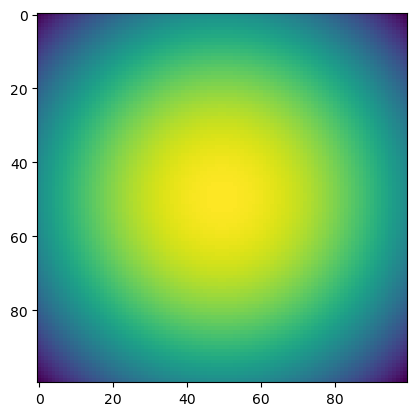

In [477]:
# c)

def gaussian_2D (sigma, delta_n, n, m):
    
    x_n = -1 + (n-1)*delta_n
    x_m = -1 + (m-1)*delta_n

    gaussian = (delta_n / (np.sqrt(2*np.pi)*sigma)) * np.exp(-((x_n - x_m)**2 / (2 * sigma**2)))

    return gaussian

def create_A (n, gaussian):
    A = np.zeros([n,n])
    A = np.outer(gaussian, gaussian)
    
    return A

A = create_A(n, gaussian_kernel)

# print(A)
plt.figure()
plt.imshow(A)
plt.show()

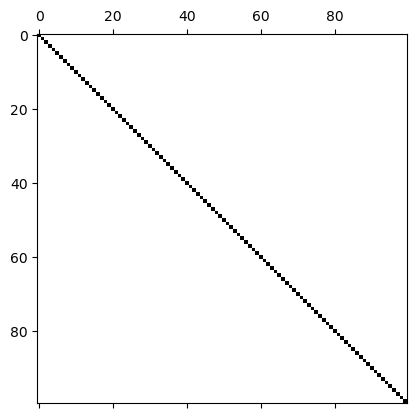

1.6771959317212028e-16


In [478]:
# d)
[U, W, V] = np.linalg.svd(A)

W_matrix = np.diag(W)

plt.figure()
plt.spy(W_matrix)
plt.show()

A_reco = np.dot(U, np.dot(W_matrix, V))
print(np.linalg.norm(A_reco - A))

1.6771959317212028e-16


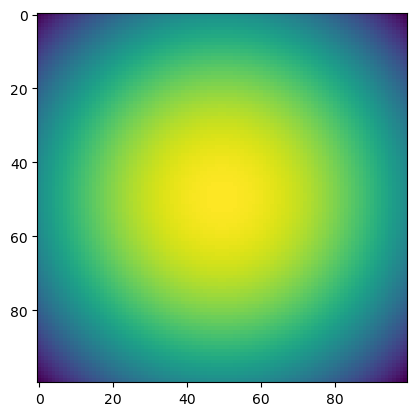

In [479]:
# e)

n = 100
grid2 = np.linspace(-1,1,n)
delta_n2 = 2 / (n-1)
gaussian_kernel2 = gaussian_1D(mean, sigma, delta_n, grid2)
A2 = create_A(n, gaussian_kernel2)

[U2, W2, V2] = np.linalg.svd(A2)
W2_matrix = np.diag(W2)
hmm = np.dot(U2, np.dot(W2_matrix, V2))
print(np.linalg.norm(hmm - A2))
plt.figure()
plt.imshow(A2)
plt.show()

Verify W*W^dagger = I
0.0
0.0
Verify A*A^dagger = I
13.309557388422373
8.893093497006218e+17
6.081824679366193
[[0.00156019 0.00156144 0.00156266 ... 0.00156266 0.00156144 0.00156019]
 [0.00156144 0.00156269 0.00156391 ... 0.00156391 0.00156269 0.00156144]
 [0.00156266 0.00156391 0.00156514 ... 0.00156514 0.00156391 0.00156266]
 ...
 [0.00156266 0.00156391 0.00156514 ... 0.00156514 0.00156391 0.00156266]
 [0.00156144 0.00156269 0.00156391 ... 0.00156391 0.00156269 0.00156144]
 [0.00156019 0.00156144 0.00156266 ... 0.00156266 0.00156144 0.00156019]]
[[0.06078963 0.06083828 0.06088597 ... 0.06088597 0.06083828 0.06078963]
 [0.06083828 0.06088697 0.06093469 ... 0.06093469 0.06088697 0.06083828]
 [0.06088597 0.06093469 0.06098246 ... 0.06098246 0.06093469 0.06088597]
 ...
 [0.06088597 0.06093469 0.06098246 ... 0.06098246 0.06093469 0.06088597]
 [0.06083828 0.06088697 0.06093469 ... 0.06093469 0.06088697 0.06083828]
 [0.06078963 0.06083828 0.06088597 ... 0.06088597 0.06083828 0.06078963]]


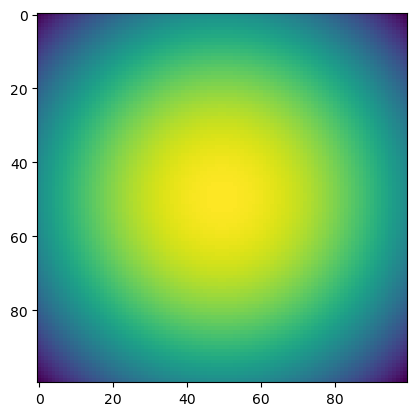

In [480]:
# f)

def invert_W(W):
    W_inverse = np.zeros(W.shape[0])
    for k in range(len(W_inverse)):
        W_inverse[k] = 1/W[k,k]

    return np.diag(W_inverse)

W_inverse = invert_W(W2_matrix) #np.linalg.pinv(W2_matrix)
# print(np.diag(W_inverse))
# print(np.diag(W2_matrix))
print('Verify W*W^dagger = I')
print(np.linalg.norm(np.identity(n) - np.dot(W_inverse, W2_matrix)))
print(np.linalg.norm(np.identity(n) - np.dot(W2_matrix, W_inverse)))

pseudo_A2 = np.matmul(np.matmul(np.transpose(V2), W_inverse), np.transpose(U2))

print('Verify A*A^dagger = I')
print(np.linalg.norm(np.identity(n) - np.dot(pseudo_A2, A2)))
print(np.linalg.norm(pseudo_A2 - A2))
print(np.linalg.norm(A2 - np.linalg.pinv(A2)))

print(A2)
print(np.linalg.pinv(A2, rcond=1e-001))

plt.figure()
plt.imshow(np.linalg.pinv(A2, rcond=1e-01))
plt.show()

C2. Convolution Theorem

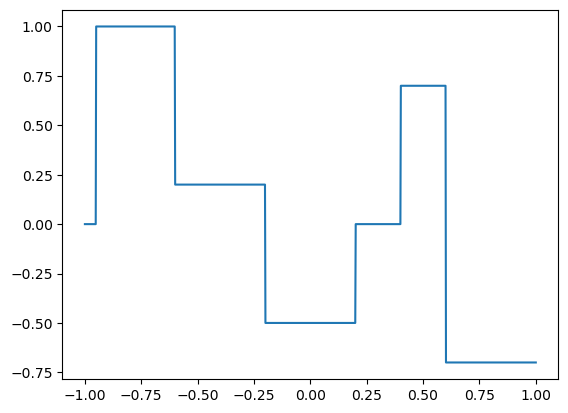

In [481]:
# a)
n = 1000
# class signal():
#     def __init__(self, n):
#         self.n = n
#         self.grid2 = np.linspace(-1,1,num=self.n)

def function(n):
    f = np.zeros(n)
    grid2 = np.linspace(-1,1,n)
    for k in range(len(f)):
        if -0.95<grid2[k]<=-0.6:
            f[k] = 1
        elif -0.6<grid2[k]<=-0.2:
            f[k] = 0.2
        elif -0.2<grid2[k]<=0.2:
            f[k] = -0.5
        elif 0.4<grid2[k]<=0.6:
            f[k] = 0.7
        elif 0.6<grid2[k]<=1:
            f[k] = -0.7

    return f, grid2
    
f, grid2 = function(n)
plt.figure()
plt.plot(grid2, f)
plt.show()

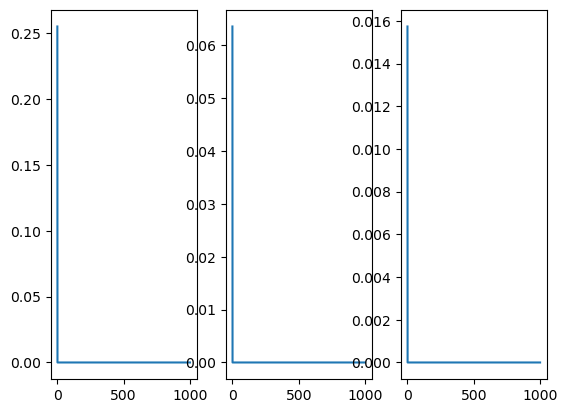

In [482]:
# b)

delta_n2 = 2/(n-1)

gaussian_005 = gaussian_1D(mean, sigma=0.05, delta_n=delta_n2, grid=grid2)
A_005 = create_A(n, gaussian_005)
[U_005, W_005, V_005] = np.linalg.svd(A_005)

gaussian_01 = gaussian_1D(mean, sigma=0.1, delta_n=delta_n2, grid=grid2)
A_01 = create_A(n, gaussian_01)
[U_01, W_01, V_01] = np.linalg.svd(A_01)

gaussian_02 = gaussian_1D(mean, sigma=0.2, delta_n=delta_n2, grid=grid2)
A_02 = create_A(n, gaussian_02)
[U_02, W_02, V_02] = np.linalg.svd(A_02)

plt.figure()
plt.subplot(1,3,1)
plt.plot(W_005)
plt.subplot(1,3,2)
plt.plot(W_01)
plt.subplot(1,3,3)
plt.plot(W_02)
plt.show()


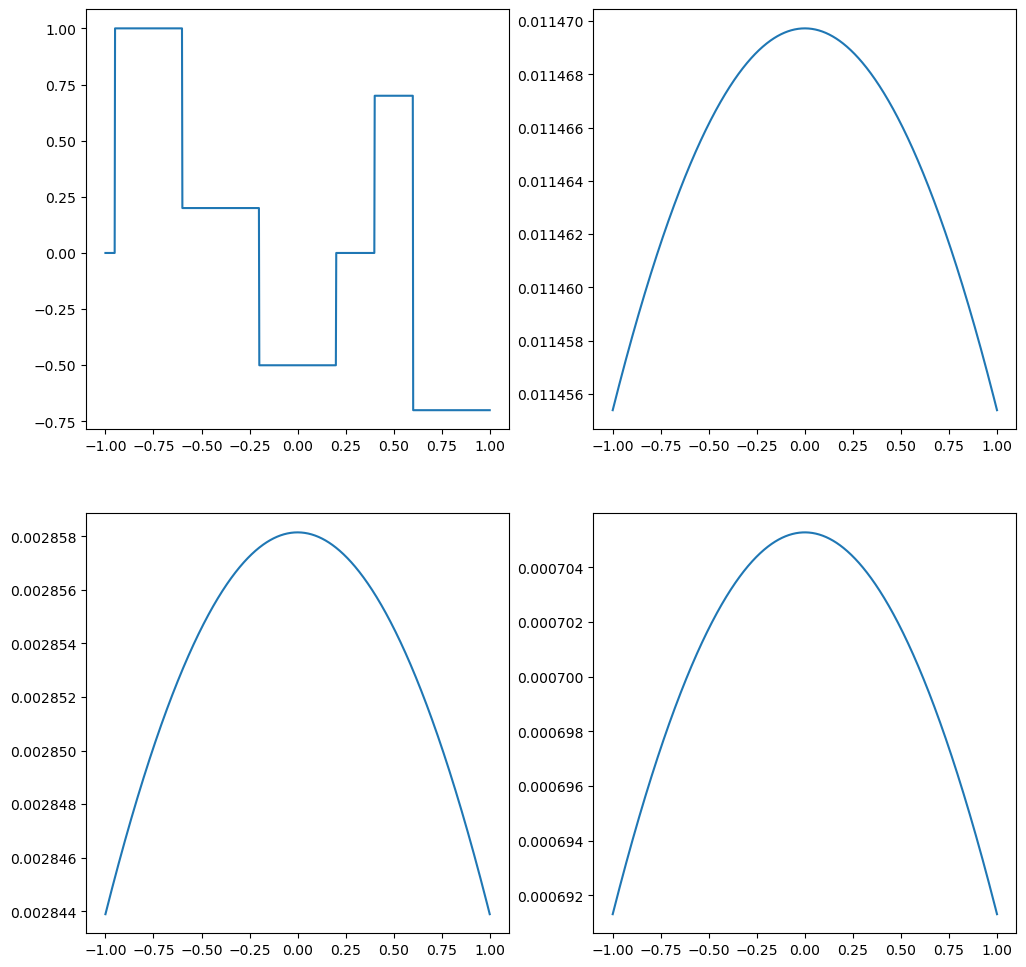

In [491]:
# c)

conv_005 = np.matmul(f.transpose(), A_005)
conv_01 = np.matmul(f, A_01)
conv_02 = np.matmul(f, A_02)

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs[0,0].plot(grid2, f)
axs[0,1].plot(grid2, conv_005)
axs[1,0].plot(grid2, conv_01)
axs[1,1].plot(grid2, conv_02)



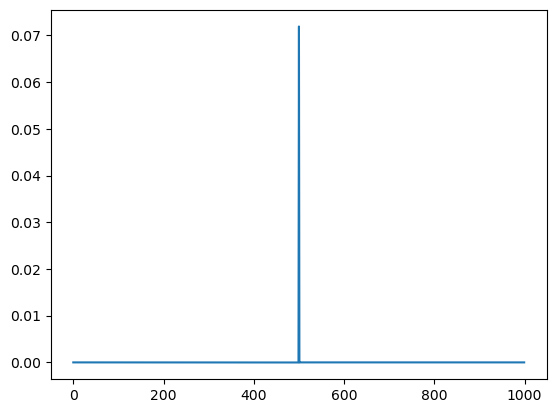

In [499]:
# d)

conv_005_2 = np.fft.fftshift(np.matmul(np.fft.fft(f), np.fft.fft(A_005)))

plt.figure()
plt.plot(conv_005_2)
plt.show()